In [1]:

__author__ = "Philipp Kats"
__date__ = "2016_02_09"

%pylab inline
import matplotlib.pyplot as plt

import os

import pandas as pd
import geopandas as gp

PWD = os.getenv('PWD')
os.chdir(PWD + '/code')

Populating the interactive namespace from numpy and matplotlib


In [77]:
# zipcode maps
zipPath = '../data/misk/ZIP_modified/zip_modified.shp'
zips = gp.read_file(zipPath)[['geometry', 'ZIPCODE']]
print zips.crs

{u'lon_0': -74, u'ellps': u'GRS80', u'y_0': 0, u'no_defs': True, u'proj': u'lcc', u'x_0': 300000.0000000001, u'units': u'us-ft', u'lat_2': 41.03333333333333, u'lat_1': 40.66666666666666, u'lat_0': 40.16666666666666}


In [78]:
# dataset to cluster
datum = pd.read_pickle('zipJoined.pkl')

In [79]:
datum.head(4)

,id,timestamp,lon,lat,tweet,user_id,rtwts,fvrts,application,source,ts,geometry,index_right,postalCode
0,550441283261857792,1420088403,-73.816546,40.673936,My face when people say some dumb shxt that do...,2466734767,0,0,Twitter for iPhone,M,2015-01-01 00:00:03,POINT (-73.816546 40.673936),152,11420
1,550441288076914688,1420088404,-74.003244,40.709564,“@WorIdStarComedy: this how niggas bout to be ...,420630924,0,0,Twitter for iPhone,M,2015-01-01 00:00:04,POINT (-74.003244 40.709564),132,10038
2,550441288609587202,1420088404,-73.975329,40.620802,@Moscowitalian76 @xenon__54 @VRSoloviev я несм...,1924308818,0,0,Twitter for iPhone,M,2015-01-01 00:00:04,POINT (-73.975329 40.620802),37,11204
4,550441301574189056,1420088407,-73.895624,40.657934,@jondecastro Aye!! You already know Jon!!! Ple...,960297817,0,0,Twitter for iPhone,M,2015-01-01 00:00:07,POINT (-73.895624 40.657934),144,11207


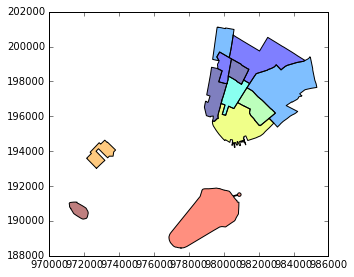

In [81]:
lmZips = [str(x) for x in (10004, 10005, 10006, 10007, 10038, 10280,10282, 10281, 10048)]
lm = zips[zips.ZIPCODE.isin(lmZips)]
lm.plot(figsize=(5,5));

In [134]:
lmData = datum[datum.postalCode.isin(lmZips)]

In [135]:
lmData['x'] = lmData.geometry.apply(lambda P: P.x)
lmData['y'] = lmData.geometry.apply(lambda P: P.y)

/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [136]:
lmData.head(3)

,id,timestamp,lon,lat,tweet,user_id,rtwts,fvrts,application,source,ts,geometry,index_right,postalCode,x,y
1,550441288076914688,1420088404,-74.003244,40.709564,“@WorIdStarComedy: this how niggas bout to be ...,420630924,0,0,Twitter for iPhone,M,2015-01-01 00:00:04,POINT (-74.003244 40.709564),132,10038,-74.003244,40.709564
89,550441834447917056,1420088534,-74.017843,40.711333,The only way to go home and sleep. @ Battery P...,33046359,0,0,Instagram,M,2015-01-01 00:02:14,POINT (-74.017843 40.711333),193,10280,-74.017843,40.711333
141,550442167135907840,1420088614,-74.009158,40.711317,I love New York🗽 http://t.co/CJADqtmZwf,727585926,0,0,Twitter for iPhone,M,2015-01-01 00:03:34,POINT (-74.009158 40.711317),129,10007,-74.009158,40.711317


In [119]:

lmData[['x','y','ts','application']].to_csv('LowerManhattan/all_lower_manhattan.csv', encoding='utf8')

## READ Access points location

In [121]:
ap = gp.read_file('../data/LM_shapefiles/AP_sites2/AP.shp')

In [122]:
ap.crs = {'init': 'epsg:4326', 'no_defs': True}
lm.to_crs(epsg=4326, inplace=1)

In [123]:
ap.to_crs(epsg=2236, inplace=1)
lm.to_crs(epsg=2236, inplace=1)

In [124]:
ap.head(3)

,AP,Active,Cluster_1,Gateway,Mac,Network,Network_ID,cluster,geometry
0,125 Maiden Lane,true,2,true,00:18:0a:04:78:d6,Water Street Corridor,VwjXUcn,NaN,POINT (2595867.188942093 6034214.740908176)
1,135 John Street,false,NaN,00:18:0a:04:6e:fc,00:18:0a:04:78:a4,Water Street Corridor,VwjXUcn,NaN,POINT (2596149.294287925 6034572.026904316)
2,199 Water (replacement),true,NaN,false,00:18:0a:04:04:8a,Water Street Corridor,VwjXUcn,NaN,POINT (2596292.218977133 6034497.722384385)


In [126]:
ap = ap[['AP','Network', 'geometry']]

In [154]:
ap25  = ap.copy()
ap50  = ap.copy()
ap100 = ap.copy()
ap200 = ap.copy()

In [155]:
ap25.geometry  = ap.buffer(25, resolution=16)
ap50.geometry  = ap.buffer(50, resolution=16)
ap100.geometry = ap.buffer(100, resolution=16)
ap200.geometry = ap.buffer(200, resolution=16)

In [156]:
ap25['range']  = 25
ap50['range']  = 50
ap100['range'] = 100
ap200['range'] = 200

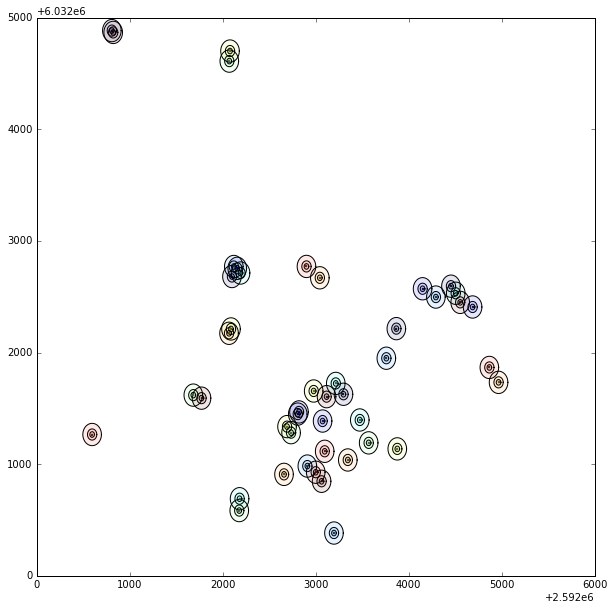

In [157]:
fig, ax = plt.subplots(figsize=(10,10))

ap100.plot(ax=ax, alpha=.1)
ap50.plot(ax=ax, alpha=.1)
ap25.plot(ax=ax, alpha=.1)
ap.plot(ax=ax)

## SPATIAL JOINT

In [158]:
from geopandas.tools import sjoin

In [159]:
lmd = lmData[['geometry', 'application', 'postalCode','ts']]

In [160]:
lmd.to_crs(epsg=2236, inplace=1)

In [161]:
print lmd.crs
print ap200.crs

{'init': 'epsg:2236', 'no_defs': True}
{'init': 'epsg:2236', 'no_defs': True}


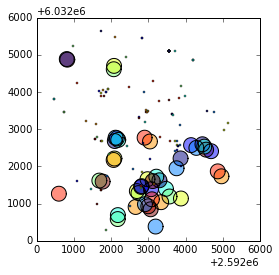

In [169]:
fig, ax = plt.subplots(figsize=(4,4))

ap200.plot(ax=ax)
lmd.iloc[:100,:].plot(ax=ax)

In [171]:
lmd.reset_index(inplace=1)

In [202]:
def generate_Buffer(data, buf, r=200):
    '''generate'''
    d = sjoin(data, buf, how="inner")
    
    d['x'] = d.geometry.apply(lambda P: P.x)
    d['y'] = d.geometry.apply(lambda P: P.y)

    d.drop(['index','geometry', 'index_right'],1, inplace=1)
    print d.columns
    print len(d)
    d.to_csv('LowerManhattan/bufferData%d.csv' % r, encoding='utf8')

In [203]:
generate_Buffer(lmd, ap200, r=200)

Index([u'application', u'postalCode', u'ts', u'AP', u'Network', u'range', u'x',
       u'y'],
      dtype='object')
45731


In [204]:
generate_Buffer(lmd, ap100, r=100)

Index([u'application', u'postalCode', u'ts', u'AP', u'Network', u'range', u'x',
       u'y'],
      dtype='object')
14645


In [208]:
generate_Buffer(lmd, ap50, r=50)

Index([u'application', u'postalCode', u'ts', u'AP', u'Network', u'range', u'x',
       u'y'],
      dtype='object')
4451


In [207]:
generate_Buffer(lmd, ap25, r=25)

Index([u'application', u'postalCode', u'ts', u'AP', u'Network', u'range', u'x',
       u'y'],
      dtype='object')
1105
